# 코드 분석

### 코드세트 개수 분석(처음에는 2개, 나중에 3개)

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open('./2021_10_31.pkl', 'rb') as f:
  datas = pickle.load(f)

In [ ]:
len(datas)

977

In [ ]:
after2020 = []
for data in datas:
  try:
    if int(data['Date'][:4]) >= 2019:
      after2020.append(data)
  except:
    pass
len(after2020)

126

In [ ]:
datas[0].keys()

dict_keys(['Date', 'WhoUploaded', 'Original_keynote', 'New_chord', 'Country', 'Artist', 'Chord_rates_with_space', 'Space_num', 'Songname', 'Genre', 'BPM'])

In [ ]:
genreset = set()
for data in datas:
  genreset.add(data['Genre'])
print(genreset)

{'pop', 'OST', '', '포크/블루스/컨트리', 'r&amp;b/soul', '발라드', 'edm', '일렉트로니카', '댄스', '인디음악', '랩/힙합', 'ost', '록/메탈'}


In [ ]:
# datas = [data for data in datas if not data['Date']=='' and 1900 < int(data['Date'][:4]) < 2000]

In [ ]:
# new_chords
# out = []
# for data in datas:
#   if '발라드' in data['Genre']:
#     chord = data['New_chord']
#   # chord = data['New_chord']
#   chord1 = chord[:-1]
#   chord2 = chord[1:]
#   for c1, c2 in zip(chord1, chord2):
#     out.append(c1+'_'+c2)

# 4 chords
out = []
for data in datas:
  if 'ost' in data['Genre']:
    chord = data['New_chord']
  else:
    continue
  chord = data['New_chord']
  chord1 = chord[:-3]
  chord2 = chord[1:-2]
  chord3 = chord[2:-1]
  chord4 = chord[3:]
  for c1, c2, c3, c4 in zip(chord1, chord2, chord3, chord4):
    out.append('_'.join([c1,c2,c3,c4]))

In [ ]:
from collections import Counter

C_out = Counter(out)

In [ ]:
sortedC = sorted(C_out.items(), key=lambda x:x[1], reverse=True)
x = [i[0] for i in sortedC]
y = [i[1] for i in sortedC]

In [ ]:
x[:10]

['C_G_Am_F',
 'Am_F_C_G',
 'G_Am_F_C',
 'F_C_G_Am',
 'G_C_G_Am',
 'C_F_G_C',
 'Dm_G_C_F',
 'F_G_C_G',
 'Am_Dm_G_C',
 'F_G_C_F']

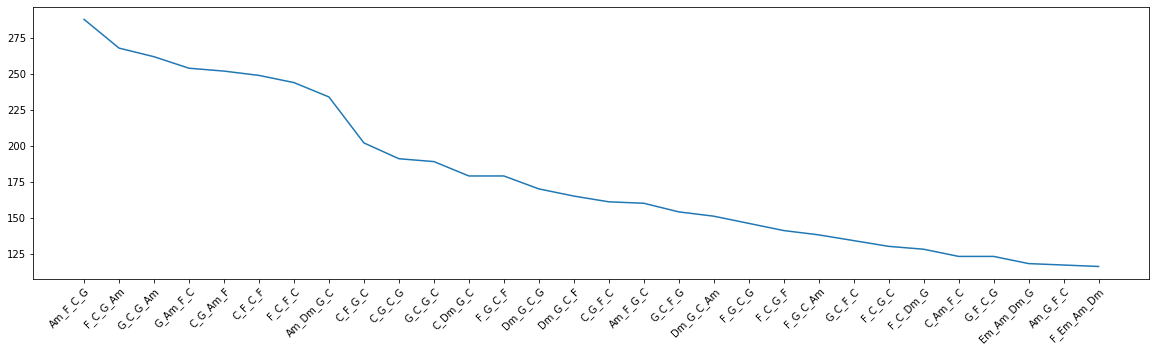

In [ ]:
fig, axe = plt.subplots(figsize=(20,5))
# plt.yscale('log')
plt.plot(x[:30], y[:30])
plt.setp(axe.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
plt.show()

In [ ]:
# 해당 코드세트가 나온것만 검색하기
wannacheck = 'C_G'
a, b = wannacheck.split('_')
new_out = []
for chord in sortedC:
  if wannacheck == chord[0][:len(wannacheck)] \
      and a not in chord[0][len(wannacheck):] \
      and b not in chord[0][len(wannacheck):]:
    new_out.append(chord)

x = [i[0] for i in new_out]
y = [i[1] for i in new_out]

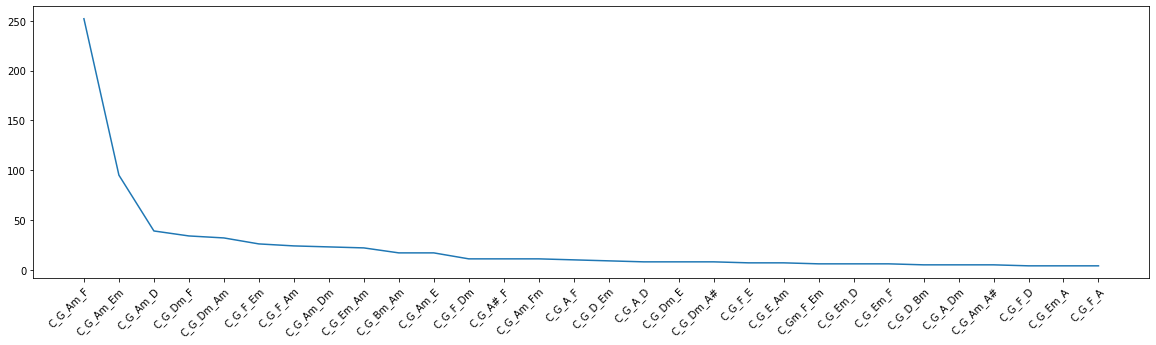

In [ ]:
fig, axe = plt.subplots(figsize=(20,5))
# plt.yscale('log')
plt.plot(x[:30], y[:30])
plt.setp(axe.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
plt.show()

No handles with labels found to put in legend.


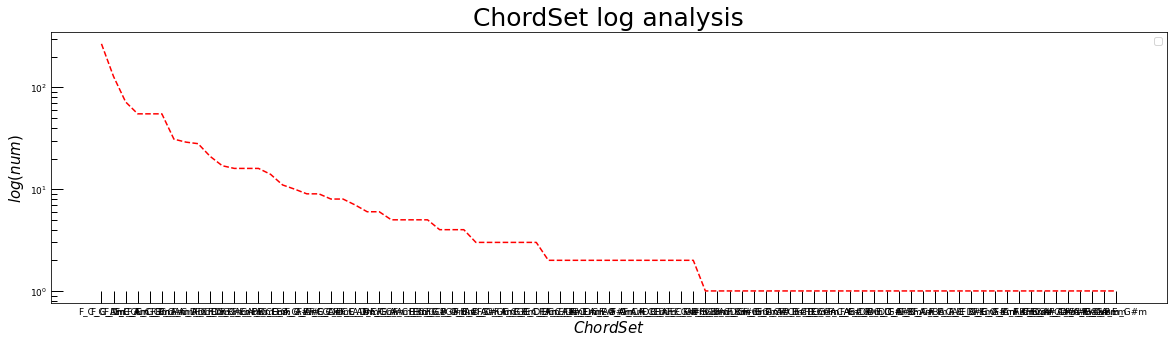

In [ ]:
# log scale로 변경
fig, ax = plt.subplots(figsize=(20,5))   
plt.title("ChordSet log analysis", fontsize=25)
# ax.scatter(x[:30], y[:30], marker='o', facecolors='none', edgecolors='r', s=100)
ax.plot(x, y, ls = '--', c = 'r')
ax.tick_params(direction='in', which = 'major', labelsize = 9, length=12, width=1., grid_alpha=0.)
ax.tick_params(direction='in', which = 'minor', labelsize = 9, length=6, width=1., grid_alpha=0.)
ax.set_xlabel('$ChordSet$', fontsize=15)
ax.set_ylabel('$log(num)$', fontsize=15)
ax.set_yscale('log')
plt.legend()
plt.show()

### 2차원 그리드로 시각화

In [ ]:
import seaborn as sns

In [ ]:
# cubehelix, YlGnBu, Greys, coolwarm
def my_imshow(data, **kwargs):
    """Wrapper for imshow that sets common defaults."""
    plt.imshow(data, interpolation='nearest', aspect='auto', 
               origin='bottom', cmap='YlGnBu', **kwargs)

In [ ]:
all_chords = ['N', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 
              'B', 'Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm', 'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm']

In [ ]:
# new_chords
def chord2heat(datas, genre='발라드'):
  out2 = []
  for data in datas:
    _chord = []
    # ost는 ost, OST가 있어서..
    if genre == 'ost':
      if 'ost' == data['Genre'] or 'OST' == data['Genre']:
        chord = data['New_chord']
      else: continue

    if genre == data['Genre']:
      chord = data['New_chord']
    else: continue
    # chords를 숫자로 전환
    for ch in chord:
      try:
        _chord.append(all_chords.index(ch))
      except: 
        print(chord)
        break


    chord1 = _chord[:-1]
    chord2 = _chord[1:]
    for c1, c2 in zip(chord1, chord2):
      out2.append([c1, c2])
  # data를 2차원 배열로 바꾸는 노력이 필요해보인다.
  heatdata = np.zeros([25,25])
  for c1, c2 in out2:
    heatdata[c1, c2] += 1 
  return heatdata

In [ ]:
# heat1990 = chord2heat([data for data in datas if not data['Date']=='' and 1900 < int(data['Date'][:4]) < 2000], '발라드')
# heat2010 = chord2heat([data for data in datas if not data['Date']=='' and 2000 <= int(data['Date'][:4]) <= 2021], '발라드')
# heat2010 = chord2heat(datas, 'pop')
# print(heat1990)
# len([data for data in datas if not data['Date']=='' and 1900 < int(data['Date'][:4]) < 2000])

In [ ]:
# heatmap with chord progression
def show_heat(heatdata, title='Chord progression heatmap', normed=False):
  fig, axe = plt.subplots(figsize=(12,9))
  axe.set_title(title, fontsize=20)
  if normed:
    my_imshow(heatdata)
  else:
    my_imshow(np.log10(np.maximum(1, heatdata)),)
  plt.colorbar()
  plt.xticks(np.arange(25), all_chords)
  plt.setp(axe.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  # for i in range(25):
  #     for j in range(25):
  #         text = axe.text(j, i, round(float(heatdata[i, j]), 1),
  #                        ha="center", va="center", color="w")
          
  plt.yticks(np.arange(25), all_chords)
  plt.xlabel('front', fontsize=14)
  plt.ylabel('back', fontsize=14)

192


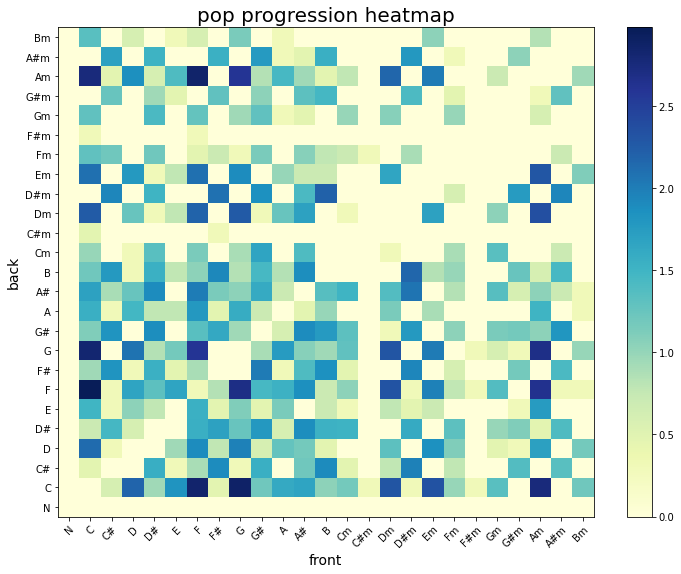

In [ ]:
# {'pop', 'OST', '', '포크/블루스/컨트리', 'r&amp;b/soul', '발라드', 'edm', '일렉트로니카', '댄스', '인디음악', '랩/힙합', 'ost', '록/메탈'}
print(len([data for data in datas if data['Genre']=="pop"]))
show_heat(chord2heat(datas, 'pop'), title='pop progression heatmap', normed=False)

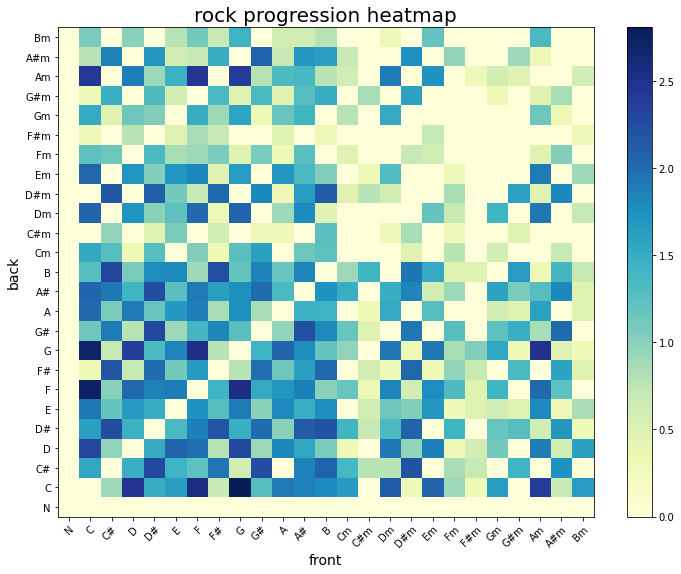

In [ ]:
show_heat(chord2heat(datas, '록/메탈'), title='rock progression heatmap', normed=False)

In [ ]:
# print(len([data for data in datas if data['Date'] and 1900 < int(data['Date'][:4]) < 2000 and data['Genre']=="록/메탈"]))
# show_heat(chord2heat([data for data in datas if data['Date'] and 1900 < int(data['Date'][:4]) < 2000], '록/메탈'), title='rock 1900 progression heatmap', normed=False)

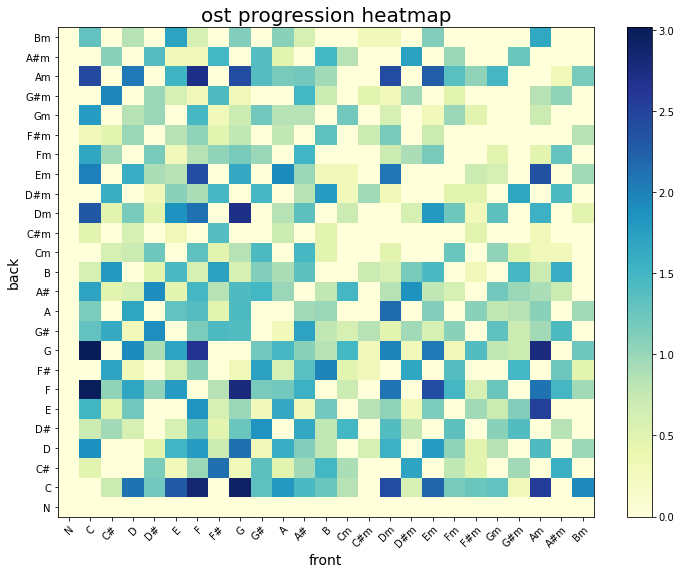

In [ ]:
show_heat(chord2heat(datas, 'ost'), title='ost progression heatmap', normed=False)

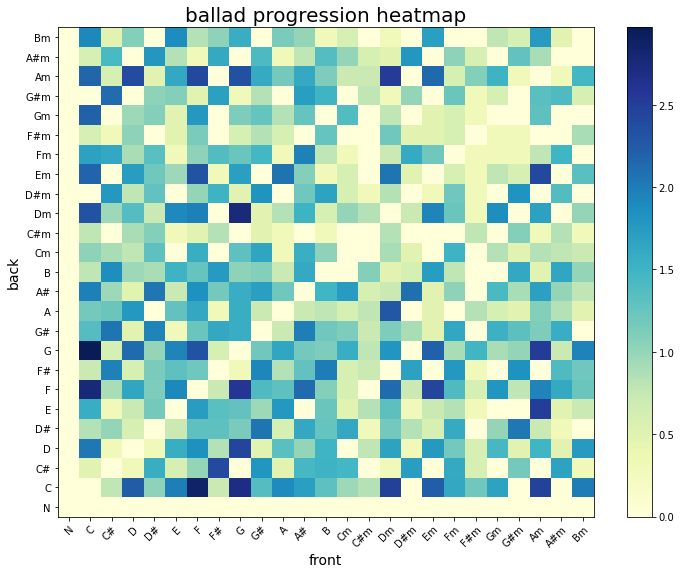

In [ ]:
show_heat(chord2heat(datas, '발라드'), title='ballad progression heatmap', normed=False)

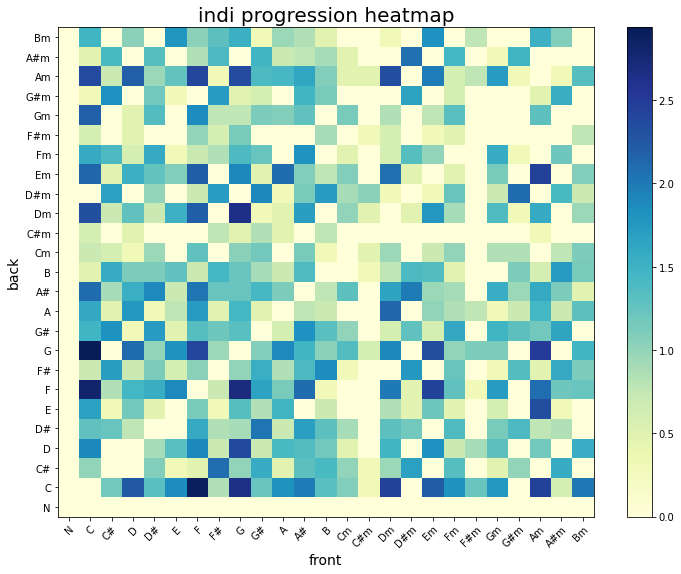

In [ ]:
show_heat(chord2heat(datas, '인디음악'), title='indi progression heatmap', normed=False)

In [ ]:
# show_heat(heat2010, title='2010 Ballad chord progression heatmap')
# show_heat(heat1990, title='1990 Ballad chord progression heatmap')

In [ ]:
# def norm(heatmap):
#   z = np.array(heatmap)
#   z /= np.sum(z)
#   return z

# a = norm(heat1990)-norm(heat2010)
# show_heat(a*10, title='Ballad 1990 --> 2010', normed=True)

In [ ]:
out2 = []
for data in datas:
  _chord = []
  if '발라드' == data['Genre']:
    chord = data['New_chord']
  else: continue
  # chords를 숫자로 전환
  for ch in chord:
    try:
      _chord.append(all_chords.index(ch))
    except: 
      # print(chord)
      break
  chord1 = _chord[:-1]
  chord2 = _chord[1:]
  detect = [all_chords.index('Dm'), all_chords.index('Am')] 
  for c1, c2 in zip(chord1, chord2):
    if detect == [c1, c2]:
      # print('  /'.join([data['Songname'], data['Date'], data['Artist']]))
      out2.append('  /'.join([data['Songname'], data['Date'], data['Artist']]))
print('\n'.join(set(out2)))

하룻밤의 꿈  /1991-11  /이상우
밤의 길목에서  /1997-04  /김세영
희망사항  /1990-02  /김민우
이젠  /1991-03  /이상우
하늘 아래서  /1993-02  /김민종
널 사랑하니까  /1993-04  /신승훈
비가 오는 날엔  /2011-05  /비스트
떠나려는 그대를  /1995-05  /일기예보
기억의 빈자리  /2017-11  /나얼
all of my life  /2017-07  /박원
너를 사랑해  /2014-08  /윤미래
천일동안  /1995-06  /이승환
저녁 하늘  /2012-10  /에일리
바람기억  /2012-09  /나얼
1월부터 6월까지  /2020-01  /윤종신
노력  /2016-11  /박원
혼자만의 사랑  /1993-10  /김건모
보이지 않는 사랑  /1991-11  /신승훈
이별의 끝은 어디인가요  /1990-08  /양수경
비  /2016-06  /폴킴
Hello  /2011-09  /허각
녹턴  /2010-04  /이은미
당신은 어디 있나요  /1990-08  /양수경
여권  /2017-05  /윤종신
편지  /2016-03  /폴킴


In [ ]:
# TODO
# - 해당 코드에 대한 1990년대와 2010년대 개수를 따로 세서, 개수를 비교한다.
# - 코드 진행 4개 세트 보기(화성학 공부와 병행)
# - 인공지능 도입 생각해보기